In [1]:
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import networkx as nx
import tsplib95
import time
import pandas as pd

In [2]:
problem_names = ["ulysses22", "eil76", "bier127", "gr202"]
best_costs = [7013, 538, 118282, 40160]

problems = [tsplib95.load(f"tsp_problems/{name}.tsp") for name in problem_names]
graphs = [problem.get_graph() for problem in problems]

for i, graph in enumerate(graphs):
    # remove self loops
    graph.remove_edges_from(nx.selfloop_edges(graph))
    # rename nodes to start from 0
    graph = nx.relabel_nodes(graph, {node: node-1 for node in graph.nodes})
    graphs[i] = graph
    print(f"Nodes in graph {problem_names[i]}:", len(graph.nodes))

Nodes in graph ulysses22: 22
Nodes in graph eil76: 76
Nodes in graph bier127: 127
Nodes in graph gr202: 202


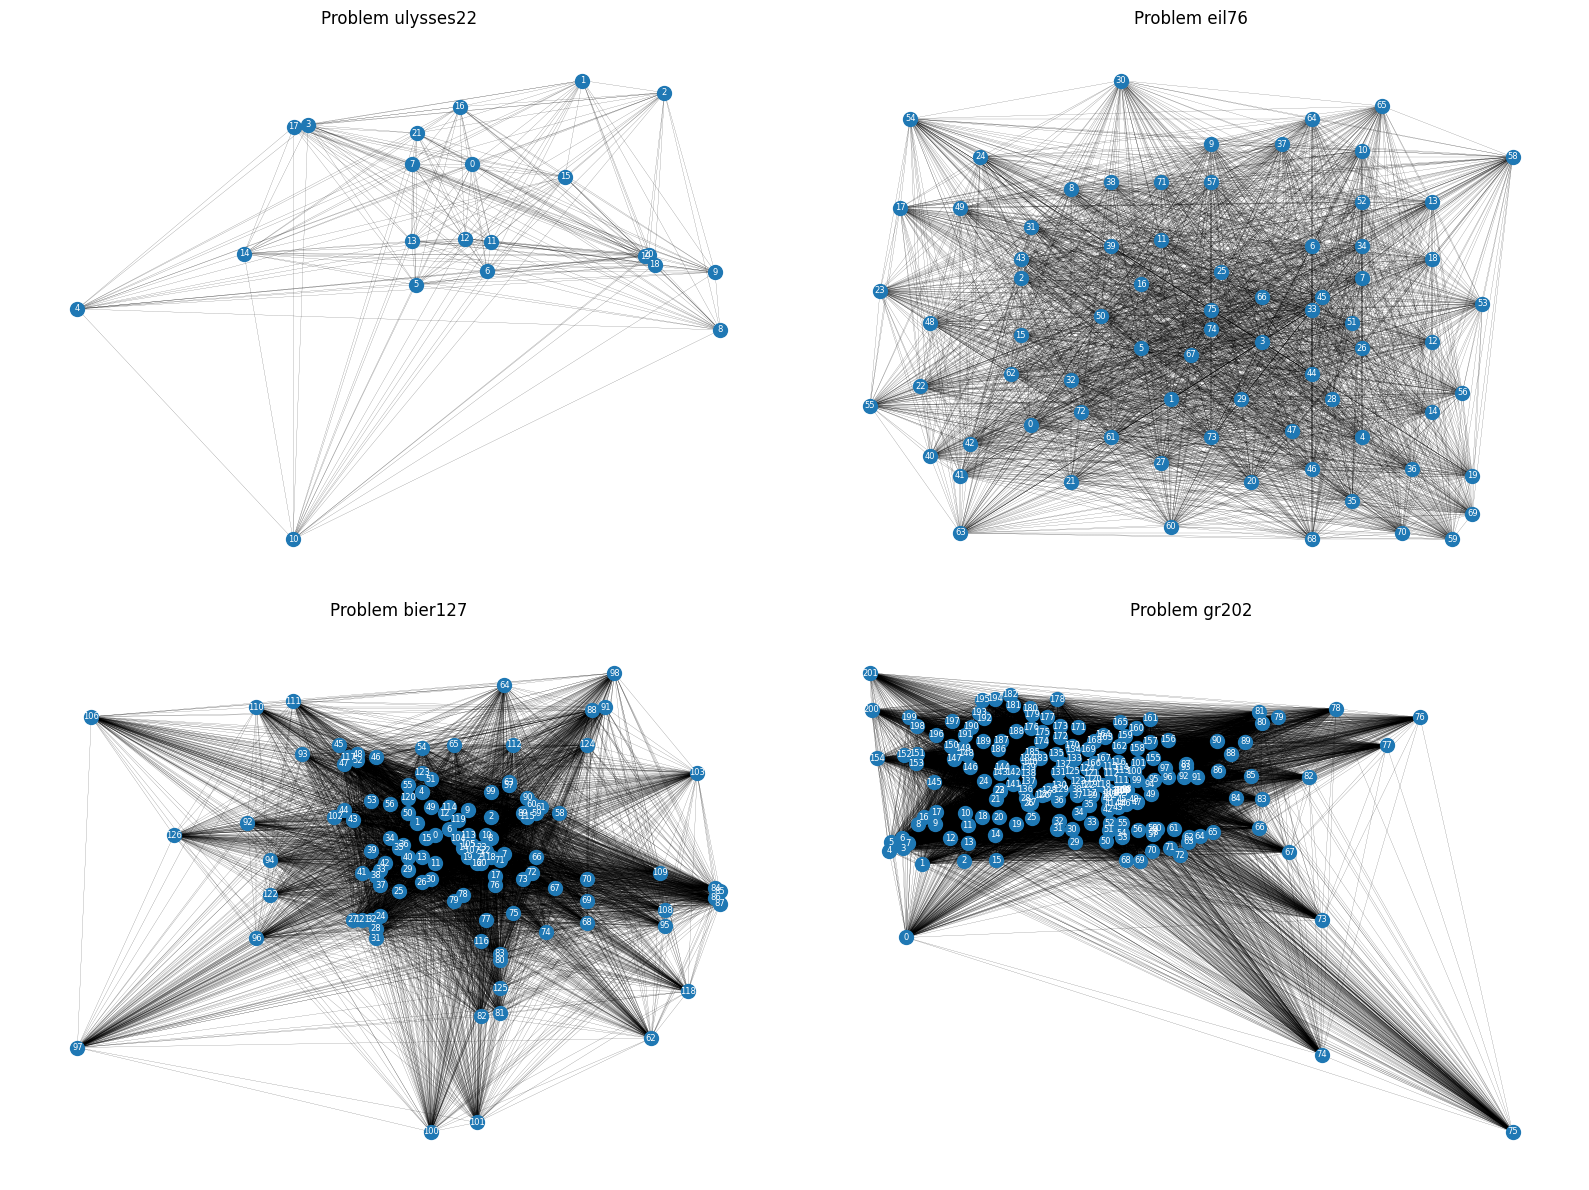

In [3]:
plt.figure(figsize=(16, 12))
for i, graph in enumerate(graphs):
    ax = plt.subplot(2, 2, i+1)
    ax.set_title(f"Problem {problem_names[i]}")
    get_graph_image(graph, ax)
plt.tight_layout()
plt.show()

In [4]:
heuristic_costs = []
for i, graph in enumerate(graphs):
    print(f"Problem: {problem_names[i]}")
    print("Optimal cost:", best_costs[i])
    path, cost = min_path_cost(graph)
    print("Min heuristic tour cost:", cost)
    print()
    heuristic_costs.append(cost)

Problem: ulysses22
Optimal cost: 7013
Min heuristic tour cost: 9425

Problem: eil76
Optimal cost: 538
Min heuristic tour cost: 701

Problem: bier127
Optimal cost: 118282
Min heuristic tour cost: 146055

Problem: gr202
Optimal cost: 40160
Min heuristic tour cost: 48191



## Analysis of the ulysses22 problem

In [5]:
a, cost = min_path_cost(graph)
graph = graphs[0]
tsp = TSP(graph, alpha=1., beta=5., alpha_rate=0.95 , beta_rate=1.05, rate=10, rho=0.9, max_iter=1000, k=int(np.sqrt(len(graph.nodes))), heuristic_cost=cost, update_steps=250)
path, _ = tsp.solve()

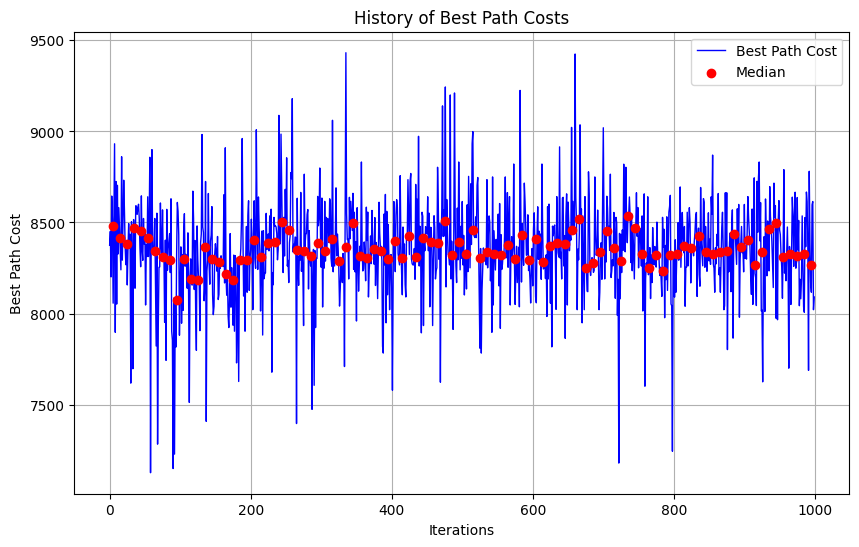

In [6]:
plot_history(tsp.history, 10)

In [7]:
tsp_sol = nx.approximation.traveling_salesman_problem(graph, cycle=True)
tsp_solution = Path(tsp_sol)
cost = tsp_solution.cost
tsp_solution_opt = Path(tsp_sol)
tsp_solution_opt.opt_alg()
cost_opt = tsp_solution_opt.cost

print("Cost with Christofides:", cost)
print("Best cost with 2-opt + Crisophides:", cost_opt)

Cost with Christofides: 7411
Best cost with 2-opt + Crisophides: 7198


[8, 9, 18, 19, 20, 15, 0, 7, 17, 3, 21, 16, 1, 2, 12, 13, 11, 6, 5, 14, 4, 10, 8]
Global optimum cost: 7013
Best path found has cost: 7126
Distance from the global optimum: 113
Relative distance from the global optimum: 0.02


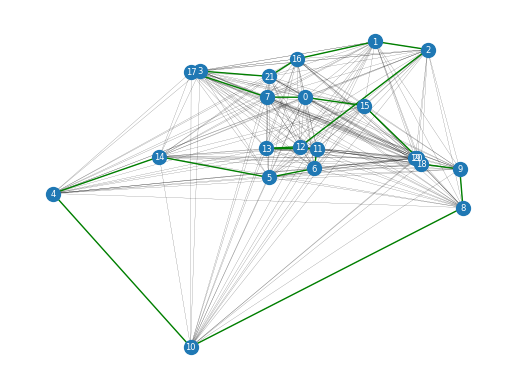

In [8]:
best_cost = best_costs[0]
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

[8, 9, 18, 19, 20, 2, 1, 16, 21, 3, 17, 7, 0, 15, 12, 13, 11, 6, 5, 14, 4, 10, 8]
Global optimum cost: 7013
Best path found has cost: 7083
Distance from the global optimum: 70
Relative distance from the global optimum: 0.01


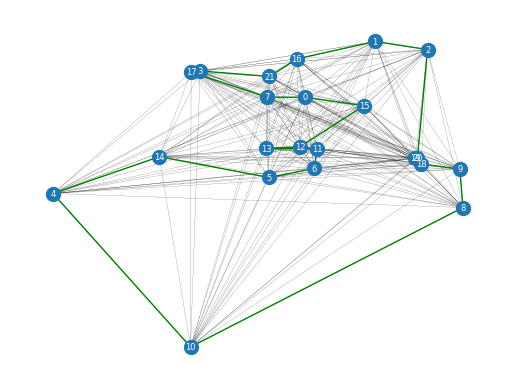

In [9]:
path.opt_alg()
best_cost = best_costs[0]
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

## Analysis of the eil72 problem

In [10]:
a, cost = min_path_cost(graph)
graph = graphs[1]
tsp = TSP(graph, alpha=1., beta=5., alpha_rate=0.95 , beta_rate=1.05, rate=10, rho=0.9, max_iter=500, k=int(np.sqrt(len(graph.nodes))), heuristic_cost=cost, update_steps=250)
path, _ = tsp.solve()

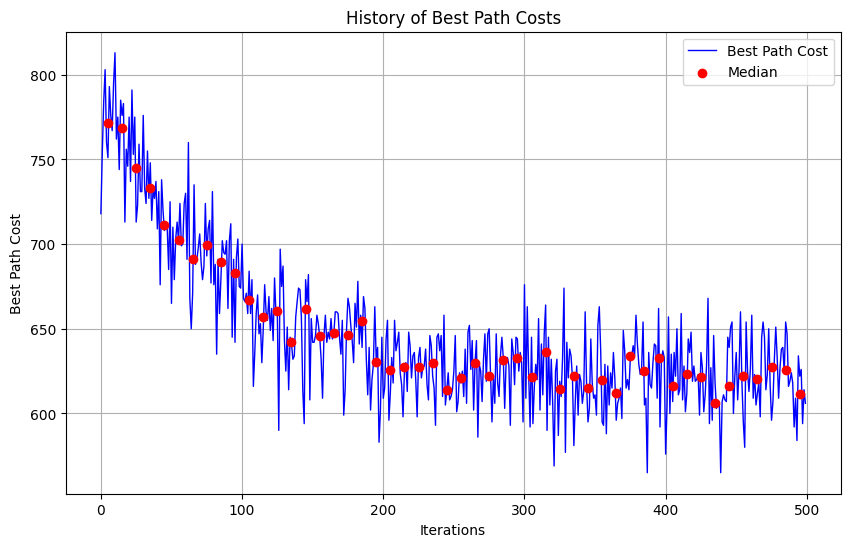

In [11]:
plot_history(tsp.history, 10)

[7, 45, 33, 51, 26, 44, 28, 47, 46, 35, 70, 59, 69, 19, 36, 4, 14, 56, 12, 53, 18, 34, 6, 66, 25, 75, 74, 3, 67, 5, 50, 16, 39, 11, 57, 71, 38, 8, 31, 43, 2, 15, 62, 32, 72, 61, 27, 73, 1, 29, 20, 68, 60, 21, 0, 42, 40, 41, 63, 55, 22, 48, 23, 49, 17, 24, 54, 30, 9, 37, 64, 10, 65, 58, 13, 52, 7]
Global optimum cost: 538
Best path found has cost: 565
Distance from the global optimum: 27
Relative distance from the global optimum: 0.05


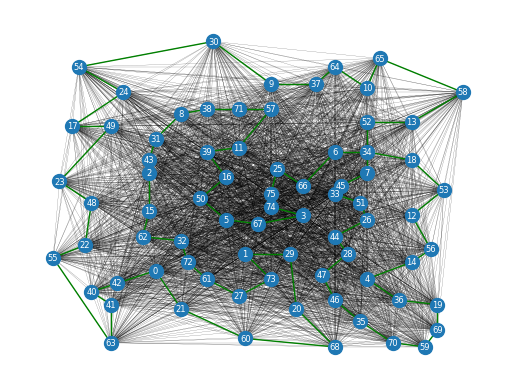

In [12]:
best_cost = best_costs[1]
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

[7, 18, 53, 12, 56, 14, 4, 36, 19, 69, 59, 70, 35, 46, 47, 28, 44, 26, 51, 33, 45, 66, 25, 75, 74, 3, 67, 5, 50, 16, 39, 11, 57, 71, 38, 8, 31, 43, 2, 15, 62, 32, 72, 61, 27, 73, 1, 29, 20, 68, 60, 21, 0, 42, 41, 63, 40, 55, 22, 48, 23, 17, 49, 24, 54, 30, 9, 37, 64, 10, 65, 58, 13, 52, 6, 34, 7]
Global optimum cost: 538
Best path found has cost: 552
Distance from the global optimum: 14
Relative distance from the global optimum: 0.03


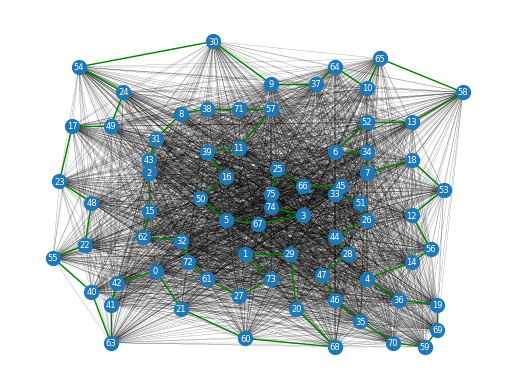

In [13]:
path.opt_alg()
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

## Analysis of the bier127 problem

In [14]:
a, cost = min_path_cost(graph)
graph = graphs[2]
tsp = TSP(graph, alpha=1., beta=5., alpha_rate=0.95 , beta_rate=1.05, rate=5, rho=0.9, max_iter=250, k=int(np.sqrt(len(graph.nodes))), heuristic_cost=cost, update_steps=100)
path, _ = tsp.solve()

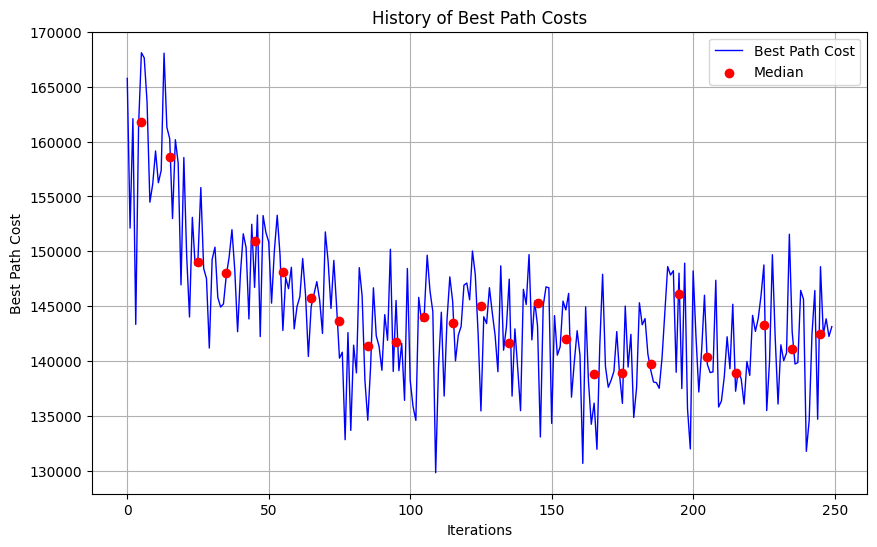

In [15]:
plot_history(tsp.history, 10)

[36, 35, 40, 13, 11, 30, 26, 29, 42, 33, 38, 41, 37, 25, 24, 32, 121, 27, 31, 28, 79, 78, 76, 17, 71, 7, 18, 21, 3, 22, 23, 5, 105, 14, 107, 19, 16, 20, 8, 10, 113, 104, 6, 119, 9, 12, 114, 49, 50, 1, 15, 0, 34, 39, 43, 44, 102, 53, 56, 120, 4, 55, 51, 123, 54, 65, 112, 57, 63, 99, 2, 89, 115, 59, 61, 60, 90, 58, 66, 72, 73, 67, 69, 70, 68, 74, 75, 77, 116, 83, 80, 125, 81, 82, 101, 100, 62, 118, 95, 108, 109, 84, 85, 86, 87, 103, 124, 88, 91, 98, 64, 46, 52, 48, 117, 47, 45, 93, 111, 110, 106, 126, 92, 94, 122, 96, 97, 36]
Global optimum cost: 118282
Best path found has cost: 129820
Distance from the global optimum: 11538
Relative distance from the global optimum: 0.10


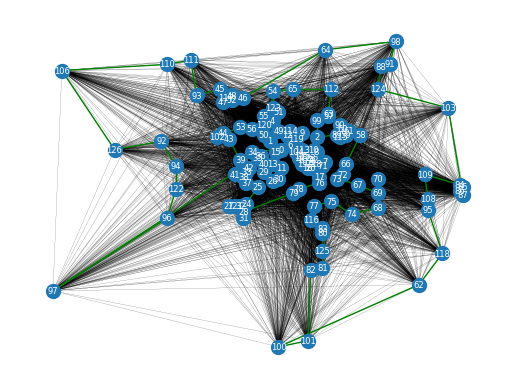

In [16]:
best_cost = best_costs[2]
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

[36, 15, 0, 1, 50, 49, 12, 114, 9, 119, 6, 104, 113, 10, 8, 5, 105, 14, 107, 19, 16, 20, 21, 3, 23, 22, 18, 7, 71, 17, 76, 78, 79, 24, 32, 121, 27, 28, 31, 97, 96, 122, 94, 92, 126, 106, 110, 111, 93, 45, 47, 117, 48, 52, 46, 54, 64, 98, 91, 88, 124, 103, 109, 84, 85, 86, 87, 108, 95, 118, 62, 101, 100, 82, 81, 125, 80, 83, 116, 77, 75, 74, 68, 69, 70, 67, 73, 72, 66, 58, 61, 90, 60, 59, 115, 89, 2, 99, 57, 63, 112, 65, 123, 51, 4, 55, 120, 56, 53, 44, 102, 43, 39, 41, 38, 37, 25, 33, 42, 29, 26, 30, 11, 13, 40, 35, 34, 36]
Global optimum cost: 118282
Best path found has cost: 122389
Distance from the global optimum: 4107
Relative distance from the global optimum: 0.03


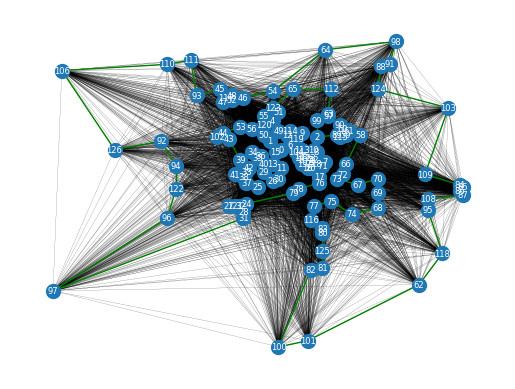

In [17]:
path.opt_alg()
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

## Analysis of the gr202 problem

In [18]:
a, cost = min_path_cost(graph)
graph = graphs[3]
tsp = TSP(graph, alpha=1., beta=5., alpha_rate=0.95 , beta_rate=1.05, rate=5, rho=0.9, max_iter=200, k=int(np.sqrt(len(graph.nodes))), heuristic_cost=cost, update_steps=100, bias=True)
path, _ = tsp.solve()

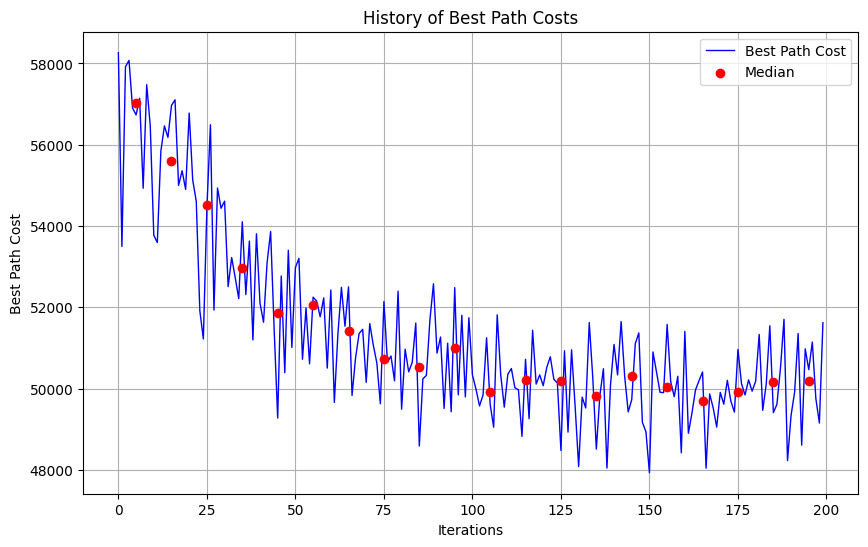

In [19]:
plot_history(tsp.history, 10)

[68, 69, 70, 71, 72, 63, 62, 64, 65, 61, 60, 59, 58, 57, 56, 54, 53, 51, 52, 55, 43, 44, 41, 40, 102, 105, 107, 108, 109, 106, 110, 98, 104, 103, 45, 48, 47, 46, 42, 35, 34, 33, 30, 31, 32, 25, 19, 14, 13, 12, 11, 18, 10, 17, 16, 9, 8, 6, 5, 7, 3, 4, 1, 2, 15, 29, 50, 27, 26, 28, 126, 127, 128, 129, 130, 38, 122, 119, 123, 120, 121, 124, 125, 131, 132, 133, 134, 170, 169, 168, 163, 164, 159, 160, 165, 161, 156, 157, 158, 162, 167, 166, 115, 114, 113, 100, 99, 94, 95, 96, 92, 91, 93, 87, 97, 155, 101, 116, 112, 111, 118, 117, 39, 37, 36, 136, 137, 141, 23, 22, 21, 24, 143, 142, 144, 139, 138, 140, 184, 183, 185, 135, 174, 175, 176, 188, 187, 189, 186, 148, 149, 150, 196, 191, 190, 192, 193, 197, 198, 199, 200, 201, 195, 194, 182, 181, 180, 179, 177, 173, 171, 172, 178, 147, 146, 145, 153, 152, 151, 154, 20, 49, 86, 88, 90, 89, 80, 81, 79, 78, 77, 76, 82, 85, 84, 83, 66, 67, 73, 74, 75, 0, 68]
Global optimum cost: 40160
Best path found has cost: 47928
Distance from the global optimum: 77

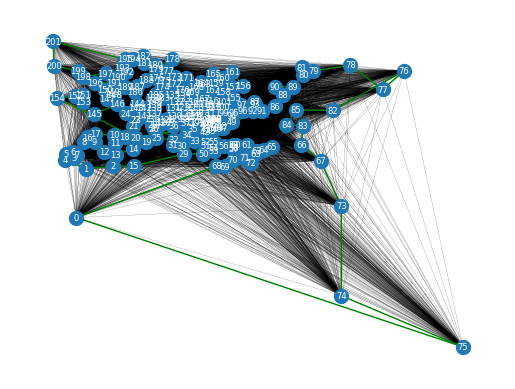

In [20]:
best_cost = best_costs[3]
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)

[68, 69, 70, 71, 72, 63, 62, 64, 65, 61, 60, 59, 58, 57, 56, 54, 53, 50, 51, 52, 55, 42, 43, 44, 41, 40, 102, 103, 104, 105, 106, 108, 109, 110, 98, 107, 45, 46, 48, 47, 49, 94, 99, 100, 113, 114, 115, 112, 111, 118, 117, 37, 39, 35, 34, 33, 29, 15, 2, 1, 4, 3, 7, 5, 6, 8, 9, 16, 17, 10, 18, 11, 12, 13, 14, 19, 31, 30, 32, 36, 127, 126, 28, 27, 26, 25, 20, 21, 145, 154, 152, 151, 153, 146, 147, 148, 149, 150, 196, 191, 190, 192, 193, 197, 198, 199, 200, 201, 195, 194, 182, 181, 178, 180, 179, 177, 173, 171, 172, 175, 176, 188, 187, 189, 186, 174, 185, 135, 183, 184, 140, 139, 138, 142, 144, 143, 24, 22, 23, 141, 137, 136, 128, 130, 129, 38, 122, 123, 119, 120, 121, 124, 125, 131, 132, 133, 134, 170, 169, 168, 163, 164, 159, 160, 165, 161, 156, 157, 158, 162, 167, 166, 116, 101, 155, 97, 95, 96, 92, 91, 93, 87, 86, 88, 90, 89, 80, 81, 79, 78, 76, 77, 82, 85, 84, 83, 66, 67, 73, 75, 74, 0, 68]
Global optimum cost: 40160
Best path found has cost: 43087
Distance from the global optimum: 29

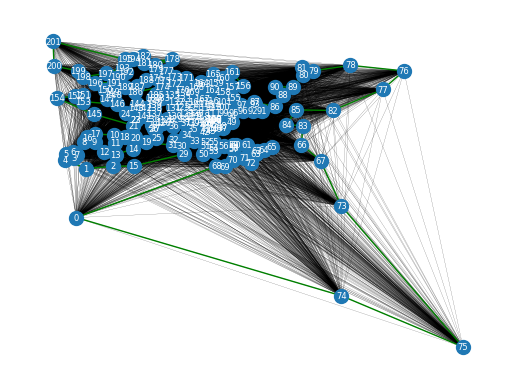

In [21]:
path.opt_alg()
print(path.path)
print("Global optimum cost:", best_cost)
print("Best path found has cost:", path.cost)
print("Distance from the global optimum:", path.cost-best_cost)
print(f"Relative distance from the global optimum: {(path.cost-best_cost)/best_cost:.4f}")
plot_path(graph, path.path)